In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict
import sys
from utils import frames_to_excel, dictmap_load, dictmap_datetime

In [5]:
print("clean_dataset - Start...")

clean_dataset - Start...


In [8]:
raw_xlsx_file = pd.ExcelFile("data/raw/raw_data.xlsx")

In [14]:
dict_dataframes = pd.read_excel(raw_xlsx_file,sheet_name = None)
list(dict_dataframes)

['HangSeng Index Data',
 'HangSeng Index Future Data',
 'S&P500 Index Data',
 'S&P500 Index Future Data',
 'CSI300 Index Data',
 'CSI300 Index Future Data',
 'DJIA index Data',
 'DJIA index future data',
 'Nikkei 225 index Data',
 'Nikkei 225 index future Data',
 'Nifty 50 index Data',
 'Nifty 50 index future Data']

In [15]:
print(type(dict_dataframes))

<class 'collections.OrderedDict'>


In [16]:
dict_dataframes = dict(dict_dataframes)

In [17]:
dict_dataframes = {k.lower(): v for k, v in dict_dataframes.items()}

In [18]:
list(dict_dataframes)

['hangseng index data',
 'hangseng index future data',
 's&p500 index data',
 's&p500 index future data',
 'csi300 index data',
 'csi300 index future data',
 'djia index data',
 'djia index future data',
 'nikkei 225 index data',
 'nikkei 225 index future data',
 'nifty 50 index data',
 'nifty 50 index future data']

In [19]:
print("\n".join(list(dict_dataframes.keys())))

hangseng index data
hangseng index future data
s&p500 index data
s&p500 index future data
csi300 index data
csi300 index future data
djia index data
djia index future data
nikkei 225 index data
nikkei 225 index future data
nifty 50 index data
nifty 50 index future data


In [20]:
for item in dict_dataframes:
    dict_dataframes[item].columns = map(str.lower, dict_dataframes[item].columns)

In [21]:
key_order = ['csi300 index data',
'csi300 index future data',
'nifty 50 index data',
'nifty 50 index future data',
'hangseng index data',
'hangseng index future data',
'nikkei 225 index data',
'nikkei 225 index future data',
's&p500 index data',
's&p500 index future data',
'djia index data',
'djia index future data',
]
list_of_tuples = [(key, dict_dataframes[key]) for key in key_order]

In [22]:
(list_of_tuples)

[('csi300 index data',
            time  open price  high price  low price  closing price  \
  0     20080701   2799.2000   2809.3800  2690.1800      2698.3500   
  1     20080702   2702.6300   2745.9400  2670.0600      2699.6000   
  2     20080703   2654.4800   2807.6800  2617.2600      2760.6100   
  3     20080704   2751.2100   2783.8500  2716.0200      2741.8500   
  4     20080707   2747.6100   2890.9900  2747.6100      2882.7600   
  ...        ...         ...         ...        ...            ...   
  2005  20160926   3267.6905   3267.6905  3220.2838      3220.2838   
  2006  20160927   3214.8704   3240.7756  3214.4414      3240.7546   
  2007  20160928   3243.6470   3243.6470  3227.9960      3230.8904   
  2008  20160929   3234.8570   3257.7668  3234.8032      3244.3874   
  2009  20160930   3240.1775   3260.9405  3239.0364      3253.2848   
  
              volume  us dollar index  shibor        macd         cci       atr  \
  0     2.885158e+05          72.3400  2.5006 -213.

In [23]:
dict_dataframes = OrderedDict(list_of_tuples)

In [26]:
for item in dict_dataframes:
    for subitem in dict_dataframes[item]:
        if 'matlab_time' in subitem:
            #print(subitem,"Dropped from ", item)
            dict_dataframes[item].drop(subitem,axis=1, inplace=True) 
        # Rename OHLC columns for consistency
        if 'open price' in subitem:
            #print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'open price':'open'},inplace=True)
        if 'high price' in subitem:
            #print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'high price':'high'},inplace=True)
        if 'low price' in subitem:
            #print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'low price':'low'},inplace=True)
        if 'closing price' in subitem:
            #print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'closing price':'close'},inplace=True)
        if 'close price' in subitem:
            #print(subitem,"Renamed from ", item)
            dict_dataframes[item].rename(columns={'close price':'close'},inplace=True)     


In [27]:
# Rename date/ntime columns to date + drop mislabeled matlab_time columns
dict_dataframes['csi300 index data'].rename(columns={'time':'date'},inplace=True)
dict_dataframes['csi300 index future data'].rename(columns={'num_time':'date'},inplace=True)

dict_dataframes['nifty 50 index data'].drop(columns=['ntime'],axis=1, inplace=True)
dict_dataframes['nifty 50 index future data'].drop(columns=['ntime'],axis=1, inplace=True)

dict_dataframes['hangseng index data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['hangseng index data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['hangseng index future data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['nikkei 225 index data'].rename(columns={'ntime':'date'},inplace=True)
dict_dataframes['nikkei 225 index data'].drop(columns=['time'],axis=1, inplace=True)

dict_dataframes['nikkei 225 index future data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['nikkei 225 index future data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['s&p500 index data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['s&p500 index data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['djia index data'].drop(columns=['time'],axis=1, inplace=True)
dict_dataframes['djia index data'].rename(columns={'ntime':'date'},inplace=True)

dict_dataframes['djia index future data'].drop(columns=['time'],axis=1, inplace=True)

In [30]:
frames_to_excel(dict_dataframes,"data/interim/clean_data.xlsx")

In [32]:
# Save clean data to disk - index data only
key_order = ['csi300 index data',
'nifty 50 index data',
'hangseng index data',
'nikkei 225 index data',
's&p500 index data',
'djia index data',
]
frames_to_excel(dict_dataframes,"data/interim/clean_data_index.xlsx",key_order)

# Save clean data to disk - future data only
key_order = [
'csi300 index future data',
'nifty 50 index future data',
'hangseng index future data',
'nikkei 225 index future data',
's&p500 index future data',
'djia index future data',
]
frames_to_excel(dict_dataframes,"data/interim/clean_data_future.xlsx",key_order)

# Load in excel file with multiple sheets
    # and map each excel sheet to an ordered dict (a dict of dataframes)
# Convert date column in each dataframe in dict of dataframes 
    # to datetime object for matplotlib, and set date column as index

#print(sys.path)
dict_dataframes= dictmap_load(path = "data/interim/clean_data.xlsx")
dict_dataframes_index = dictmap_load(path = "data/interim/clean_data_index.xlsx")   
dict_dataframes_future = dictmap_load(path = "data/interim/clean_data_future.xlsx")

dict_dataframes = dictmap_datetime(dict_dataframes)   
dict_dataframes_index = dictmap_datetime(dict_dataframes_index)
dict_dataframes_future = dictmap_datetime(dict_dataframes_future)

# print("\n".join(list(dict_dataframes_index.keys())))
# print("\n".join(list(dict_dataframes_future.keys())))
# print(dict_dataframes_index['csi300 index data'].info())
# print(dict_dataframes_future['csi300 index future data'].info())

# Save cleaned data with datetime index in data/interim folder - overwrite previous data
frames_to_excel(dict_dataframes,"data/interim/clean_data.xlsx")
frames_to_excel(dict_dataframes_index,"data/interim/clean_data_index.xlsx")
frames_to_excel(dict_dataframes_future,"data/interim/clean_data_future.xlsx")

print("clean_dataset - Finished.")

clean_dataset - Finished.


In [67]:
import copy
raw_xlsx_file = pd.ExcelFile("data/interim/clean_data.xlsx")
dict_dataframes =pd.read_excel(raw_xlsx_file,sheet_name = None)
dict_dataframes_index =  copy.deepcopy(dict_dataframes)

In [68]:
dict_dataframes_index['nifty 50 index data'].head()

,date,open,high,low,close,volume,macd,cci,atr,boll_mid,ema20,ma5,ma10,mtm6,mtm12,roc,smi,wvad,us dollar index,interbank offered rate
0,2008-07-01,4039.75,4075.40,3878.20,3896.75,164469220,-201.56,-180.03,197.2,4409.04,4385.058946,4128.49,4253.415,-369.65,-620.35,-13.733369,-0.149627,-828023961.0,72.34,8.706
1,2008-07-02,3895.30,4107.15,3848.25,4093.35,199920144,-199.63,-131.91,258.9,4384.43,4357.277142,4096.63,4204.510,-97.75,-479.15,-10.478950,-0.091225,-561033032.0,71.99,7.730
2,2008-07-03,4094.60,4097.35,3874.85,3925.75,154573765,-209.21,-129.55,222.5,4346.87,4316.179319,4018.61,4146.660,-326.90,-727.25,-15.629701,-0.097020,-726253640.3,72.73,6.400
3,2008-07-04,3926.65,4033.50,3896.40,4016.00,152045352,-207.14,-111.08,137.1,4316.28,4287.590812,3994.48,4113.505,-299.85,-566.40,-12.360335,-0.058691,-548766472.1,72.71,6.210
4,2008-07-07,4002.00,4114.50,4002.00,4030.00,125737237,-202.03,-80.86,112.5,4292.73,4263.058354,3992.37,4089.865,-106.65,-474.25,-10.528945,-0.038439,-486195115.1,72.71,9.000


In [69]:
dict_dataframes_index.keys()

odict_keys(['csi300 index data', 'csi300 index future data', 'nifty 50 index data', 'nifty 50 index future data', 'hangseng index data', 'hangseng index future data', 'nikkei 225 index data', 'nikkei 225 index future data', 's&p500 index data', 's&p500 index future data', 'djia index data', 'djia index future data'])

In [70]:
dict_dataframes_index['csi300 index data']['date'] = pd.to_datetime(dict_dataframes_index['csi300 index data']['date'].astype(str), format='%Y-%m-%d')

In [71]:
dict_dataframes_index['csi300 index data'] = dict_dataframes_index['csi300 index data'].set_index('date')
dict_dataframes_index['csi300 index data'].head()

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
date,,,,,,,,,,,,,,,,,,,
2008-07-01,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
2008-07-02,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08
2008-07-03,2654.48,2807.68,2617.26,2760.61,456603.05,72.73,2.5762,-206.941406,-112.113057,190.424,3109.044731,2978.942155,2820.8364,-208.925,2753.2792,-82.064,-2.886857,-0.031251,-5.855737e+07
2008-07-04,2751.21,2783.85,2716.02,2741.85,379050.10,72.71,2.5632,-200.759162,-81.997539,67.825,3073.107115,2956.362140,2810.0548,-239.055,2738.4454,-249.421,-8.338289,-0.017237,-7.467503e+07
2008-07-07,2747.61,2890.99,2747.61,2882.76,527320.24,72.71,2.5679,-182.386907,21.707767,149.133,3046.256923,2949.352699,2819.3370,66.742,2756.6342,109.687,3.955427,0.010701,-3.531151e+07


Text(0,0.5,'Close')

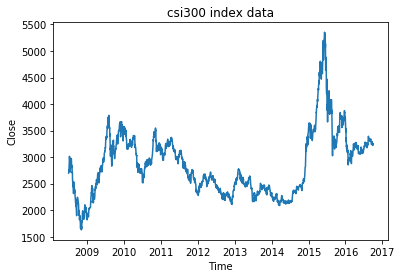

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('csi300 index data')
plt.plot(dict_dataframes_index['csi300 index data'].index,
        dict_dataframes_index['csi300 index data']['close'])
plt.xlabel('Time')
plt.ylabel('Close')
# plt.show()

In [74]:
import datetime as dt
X = dict_dataframes_index['csi300 index data'].values
X

array([[ 2.79920000e+03,  2.80938000e+03,  2.69018000e+03, ...,
        -9.42460467e+00, -9.79268693e-02, -8.72627838e+07],
       [ 2.70263000e+03,  2.74594000e+03,  2.67006000e+03, ...,
        -8.55773341e+00, -2.64972904e-02, -1.09549319e+08],
       [ 2.65448000e+03,  2.80768000e+03,  2.61726000e+03, ...,
        -2.88685731e+00, -3.12513598e-02, -5.85573695e+07],
       ...,
       [ 3.24364700e+03,  3.24364700e+03,  3.22799600e+03, ...,
        -3.25412539e+00, -9.03054995e-03, -1.52809487e+08],
       [ 3.23485700e+03,  3.25776680e+03,  3.23480320e+03, ...,
        -2.21988015e+00,  1.74378066e-03, -8.96478826e+07],
       [ 3.24017750e+03,  3.26094050e+03,  3.23903640e+03, ...,
        -2.85646040e-01, -3.01533114e-03, -4.81545298e+07]])

In [76]:
dict_dataframes['csi300 index data'].head()
dict_dataframes['csi300 index data'].drop(['date'],axis=1,inplace=True)

In [77]:
dict_dataframes['csi300 index data'].head()

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08
2,2654.48,2807.68,2617.26,2760.61,456603.05,72.73,2.5762,-206.941406,-112.113057,190.424,3109.044731,2978.942155,2820.8364,-208.925,2753.2792,-82.064,-2.886857,-0.031251,-5.855737e+07
3,2751.21,2783.85,2716.02,2741.85,379050.10,72.71,2.5632,-200.759162,-81.997539,67.825,3073.107115,2956.362140,2810.0548,-239.055,2738.4454,-249.421,-8.338289,-0.017237,-7.467503e+07
4,2747.61,2890.99,2747.61,2882.76,527320.24,72.71,2.5679,-182.386907,21.707767,149.133,3046.256923,2949.352699,2819.3370,66.742,2756.6342,109.687,3.955427,0.010701,-3.531151e+07


In [146]:
from sklearn.model_selection import TimeSeriesSplit
X = dict_dataframes['csi300 index data'].values
X

array([[ 2.79920000e+03,  2.80938000e+03,  2.69018000e+03, ...,
        -9.42460467e+00, -9.79268693e-02, -8.72627838e+07],
       [ 2.70263000e+03,  2.74594000e+03,  2.67006000e+03, ...,
        -8.55773341e+00, -2.64972904e-02, -1.09549319e+08],
       [ 2.65448000e+03,  2.80768000e+03,  2.61726000e+03, ...,
        -2.88685731e+00, -3.12513598e-02, -5.85573695e+07],
       ...,
       [ 3.24364700e+03,  3.24364700e+03,  3.22799600e+03, ...,
        -3.25412539e+00, -9.03054995e-03, -1.52809487e+08],
       [ 3.23485700e+03,  3.25776680e+03,  3.23480320e+03, ...,
        -2.21988015e+00,  1.74378066e-03, -8.96478826e+07],
       [ 3.24017750e+03,  3.26094050e+03,  3.23903640e+03, ...,
        -2.85646040e-01, -3.01533114e-03, -4.81545298e+07]])

In [187]:
splits = TimeSeriesSplit(n_splits=6)
train_list = []
test_list = []
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.arange(0,100)
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list.append(train)
    test_list.append(test)
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
#     print('Training shape: %d' % (train.shape))
#     print('Testing shape: %d' % (test.shape))
# print("Train:", train_list)
# print("Test:",test_list)


Observations: 575
Training Observations: 288
Testing Observations: 287
Observations: 862
Training Observations: 575
Testing Observations: 287
Observations: 1149
Training Observations: 862
Testing Observations: 287
Observations: 1436
Training Observations: 1149
Testing Observations: 287
Observations: 1723
Training Observations: 1436
Testing Observations: 287
Observations: 2010
Training Observations: 1723
Testing Observations: 287


In [209]:
len(train_list[0][0]),len(test_list[0][0])
print(test_list[0].shape)
print(train_list[0])
type(train_list)



(287, 19)
[[ 2.79920000e+03  2.80938000e+03  2.69018000e+03 ... -9.42460467e+00
  -9.79268693e-02 -8.72627838e+07]
 [ 2.70263000e+03  2.74594000e+03  2.67006000e+03 ... -8.55773341e+00
  -2.64972904e-02 -1.09549319e+08]
 [ 2.65448000e+03  2.80768000e+03  2.61726000e+03 ... -2.88685731e+00
  -3.12513598e-02 -5.85573695e+07]
 ...
 [ 3.14957000e+03  3.21227000e+03  3.11689000e+03 ... -1.12494886e+01
  -5.62604688e-02 -4.88211696e+07]
 [ 3.15204000e+03  3.16819000e+03  3.03073000e+03 ... -1.03202155e+01
  -2.97713159e-02 -2.31053336e+08]
 [ 3.00354000e+03  3.00354000e+03  2.82577000e+03 ... -1.77442877e+01
  -1.07729038e-01 -3.42461309e+08]]


list

288 287
3003.54 2804.58
3003.54 2804.58


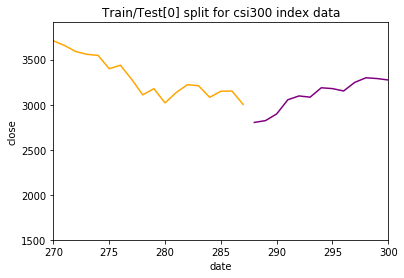

In [193]:
#Not working due to lack of datetime index from/in dataframe format

plt.title("Train/Test[0] split for csi300 index data")
plt.xlabel("date")
plt.ylabel("close")
k1 = train_list[0].shape[0]
x1 = np.arange(0,k1)
k2 = test_list[0].shape[0]
x2 = np.arange(k1,k1+k2)
train_plt = np.array(train_list[0])
test_plt = np.array(test_list[0])
plt.plot(x1,train_plt[:,0],'orange')
plt.plot(x2,test_plt[:,0],'purple')
plt.xlim(270,300)
print(k1,k2)
print(train_plt[k1-1,0],test_plt[0,0])
print(X[k1-1,0],X[k1,0])

In [181]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [289]:
from pywt import wavedec
coeffs = wavedec(train_list[0], 'haar',level=2)
cA2, cD2, cD1 = coeffs
# print(coeffs.shape)
print(cA2.shape,cD2.shape,cD1.shape)
# print(cA2)

(288, 5) (288, 5) (288, 10)


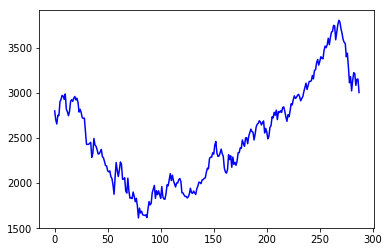

In [290]:
plt.plot(train_plt[:,0],'blue', label='Original signal')

5


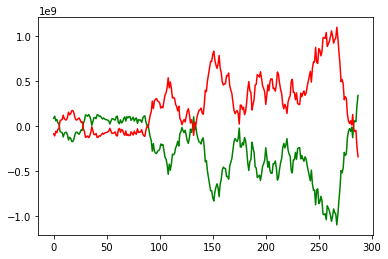

In [291]:
plt.plot(cD2[:,4],'green')
plt.plot(cA2[:,4],'red')
print(cD2.shape[1])

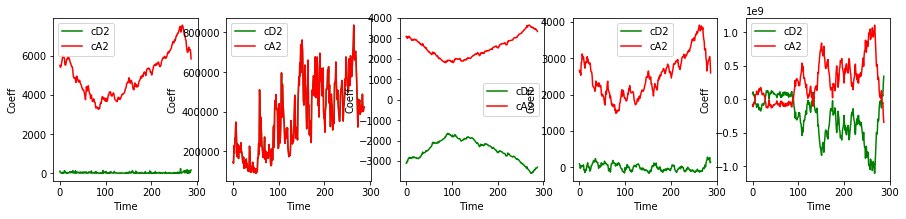

In [292]:
fig = plt.figure(figsize=(15,3 ))
for i in range(0,cD2.shape[1]):
    ax = fig.add_subplot(1,5,i+1)
    plt.plot(cD2[:,i],'green',label='cD2')
    plt.plot(cA2[:,i],'red',label='cA2')
    plt.xlabel('Time')
    plt.ylabel('Coeff')
    plt.legend()

In [293]:
# Wavelet reconstruction
import pywt
def wavelet_reconstruct(cA2,cD2,cD1):
    coeffs = cA2,cD2,cD1
    reconstructed_signal = pywt.waverec(coeffs,'haar')
    return reconstructed_signal
Train_reconst = wavelet_reconstruct(cA2,cD2,cD1)

In [286]:
Train_reconst.shape

(288, 20)

In [295]:
print(Train_reconst[2])

[ 2.65448000e+03  2.80768000e+03  2.61726000e+03  2.76061000e+03
  4.56603050e+05  7.27300000e+01  2.57620000e+00 -2.06941406e+02
 -1.12113057e+02  1.90424000e+02  3.10904473e+03  2.97894216e+03
  2.82083640e+03 -2.08925000e+02  2.75327920e+03 -8.20640000e+01
 -2.88685731e+00 -3.12513606e-02 -5.85573695e+07 -5.85573695e+07]


In [276]:
train_plt.shape

(288, 19)

In [279]:
print(train_list[0][0])

[ 2.79920000e+03  2.80938000e+03  2.69018000e+03  2.69835000e+03
  2.88515850e+05  7.23400000e+01  2.50060000e+00 -2.13078565e+02
 -1.28949052e+02  1.19200000e+02  3.17347569e+03  3.03374820e+03
  2.85125040e+03 -9.15940000e+01  2.85132620e+03 -2.80770000e+02
 -9.42460467e+00 -9.79268693e-02 -8.72627838e+07]


In [288]:
coeffs = pywt.wavedec([1,2,3,4,5,6,7,8], 'db1', level=2)
pywt.waverec(coeffs, 'db1')

array([1., 2., 3., 4., 5., 6., 7., 8.])